Degree 1 MSE on test set: 15.55
Degree 2 MSE on test set: 15.49
Degree 3 MSE on test set: 15.06


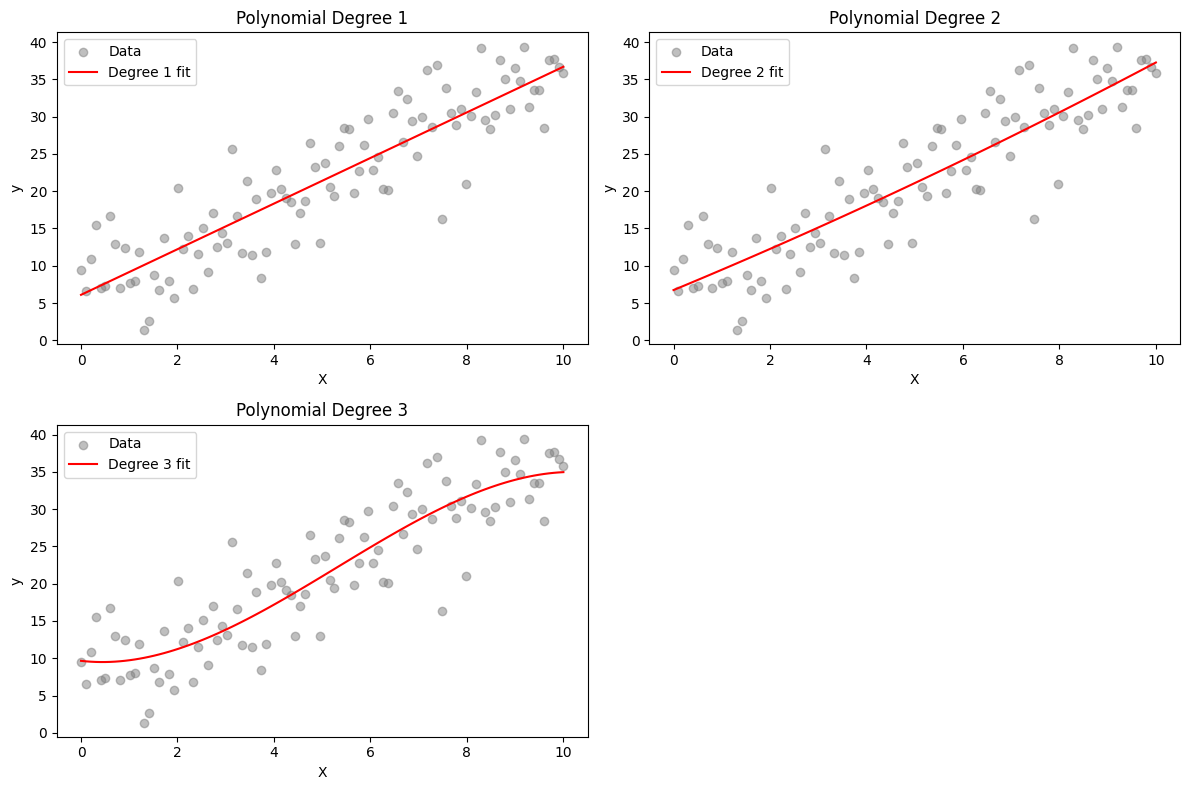

In [6]:
#answer 6

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples = 100
X = np.linspace(0, 10, n_samples)
true_y = 3 * X + 7
noise = np.random.normal(0, 5, size=n_samples)
y = true_y + noise

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3]

plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Degree {degree} MSE on test set: {mse:.2f}")

    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree} fit')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


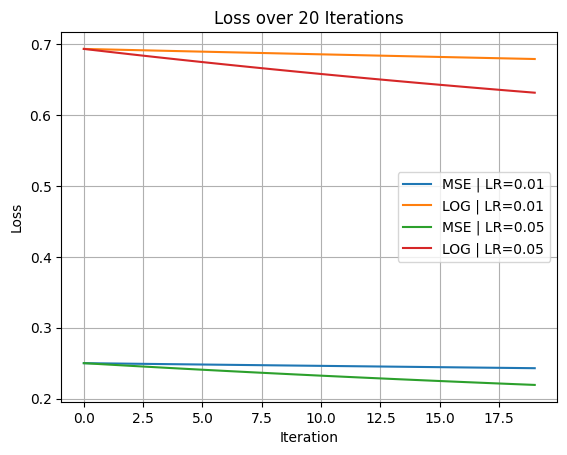


MSE | LR=0.01 Final Weights:
[-0.04687705 -0.00726411  0.02108994 -0.01722942]

LOG | LR=0.01 Final Weights:
[-0.04687705 -0.00726411  0.02108994 -0.01722942]

MSE | LR=0.05 Final Weights:
[-0.21359116 -0.0332444   0.10214071 -0.08551769]

LOG | LR=0.05 Final Weights:
[-0.21359116 -0.0332444   0.10214071 -0.08551769]


In [7]:
#answer 7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('A2_P2.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

X = np.hstack((np.ones((X.shape[0], 1)), X))
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def log_likelihood(y_true, y_pred):
    eps = 1e-9
    return np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def gradient_descent(X, y, loss_type, lr, n_iter):
    w = np.zeros((X.shape[1], 1))
    history = []

    for _ in range(n_iter):
        z = X @ w
        y_pred = sigmoid(z)

        if loss_type == 'mse':
            loss = mse_loss(y, y_pred)
            grad = X.T @ (y_pred - y) / len(y)
        else:
            loss = -log_likelihood(y, y_pred)
            grad = X.T @ (y_pred - y) / len(y)

        w -= lr * grad
        history.append(loss)

    return w, history

learning_rates = [0.01, 0.05]
loss_types = ['mse', 'log']
results = {}

for lr in learning_rates:
    for loss in loss_types:
        label = f"{loss.upper()} | LR={lr}"
        w, hist = gradient_descent(X, y, loss_type=loss, lr=lr, n_iter=20)
        results[label] = (w, hist)
        plt.plot(hist, label=label)

plt.title("Loss over 20 Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

for label, (w, _) in results.items():
    print(f"\n{label} Final Weights:\n{w.ravel()}")


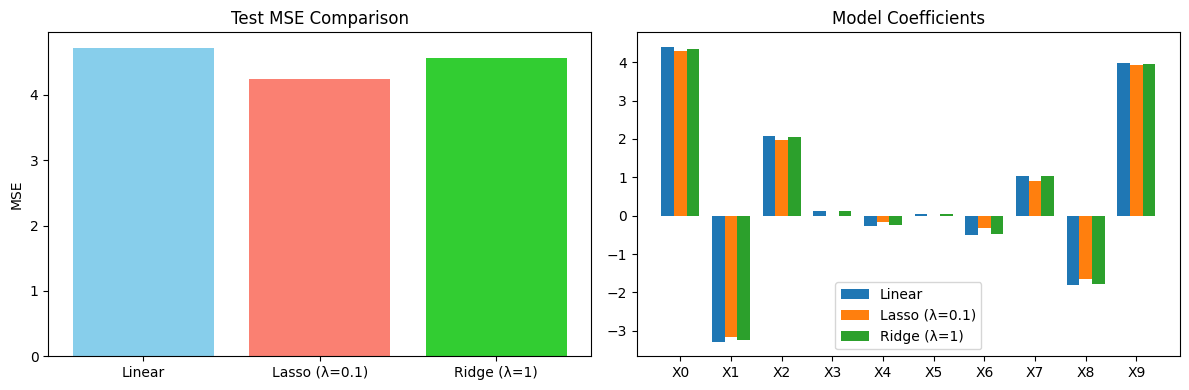

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('A2_P3.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Linear': LinearRegression(),
    'Lasso (λ=0.1)': Lasso(alpha=0.1),
    'Ridge (λ=1)': Ridge(alpha=1)
}

mse_scores = {}
coefficients = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    coefficients[name] = model.coef_

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(mse_scores.keys(), mse_scores.values(), color=['skyblue', 'salmon', 'limegreen'])
plt.title('Test MSE Comparison')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
width = 0.25
labels = [f'X{i}' for i in range(X.shape[1])]
x = np.arange(len(labels))

for i, (name, coef) in enumerate(coefficients.items()):
    plt.bar(x + i*width, coef, width=width, label=name)

plt.xticks(x + width, labels)
plt.title('Model Coefficients')
plt.legend()

plt.tight_layout()
plt.show()
